In [12]:
#############
## IMPORTS ##
#############

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
import scipy as sc

In [3]:
#####################################
## READING RED AND WHITE WINE DATA ##
#####################################
redWineData = pd.read_csv("./data/winequality-red.csv")
whiteWineData = pd.read_csv("./data/winequality-white.csv")

In [4]:
##########################################################
## GETTING THE NAMES OF ALL THE COLUMNS IN EACH DATASET ##
##########################################################
redWineColumns = redWineData.columns
whiteWineColumns = whiteWineData.columns

In [5]:
######################################
## SUMMARY OF RED & WHITE WINE DATA ##
######################################
redSummary = redWineData.describe()
whiteSummary = whiteWineData.describe()
redQualityMean = redSummary['quality']['mean']
redQualityStd = redSummary['quality']['std']
whiteQualityMean = whiteSummary['quality']['mean']
whiteQualityStd = whiteSummary['quality']['std']
redAlcoholMean = redSummary['alcohol']['mean']
redAlcoholStd = redSummary['alcohol']['std']
whiteAlcoholMean = whiteSummary['alcohol']['mean']
whiteAlcoholStd = whiteSummary['alcohol']['std']

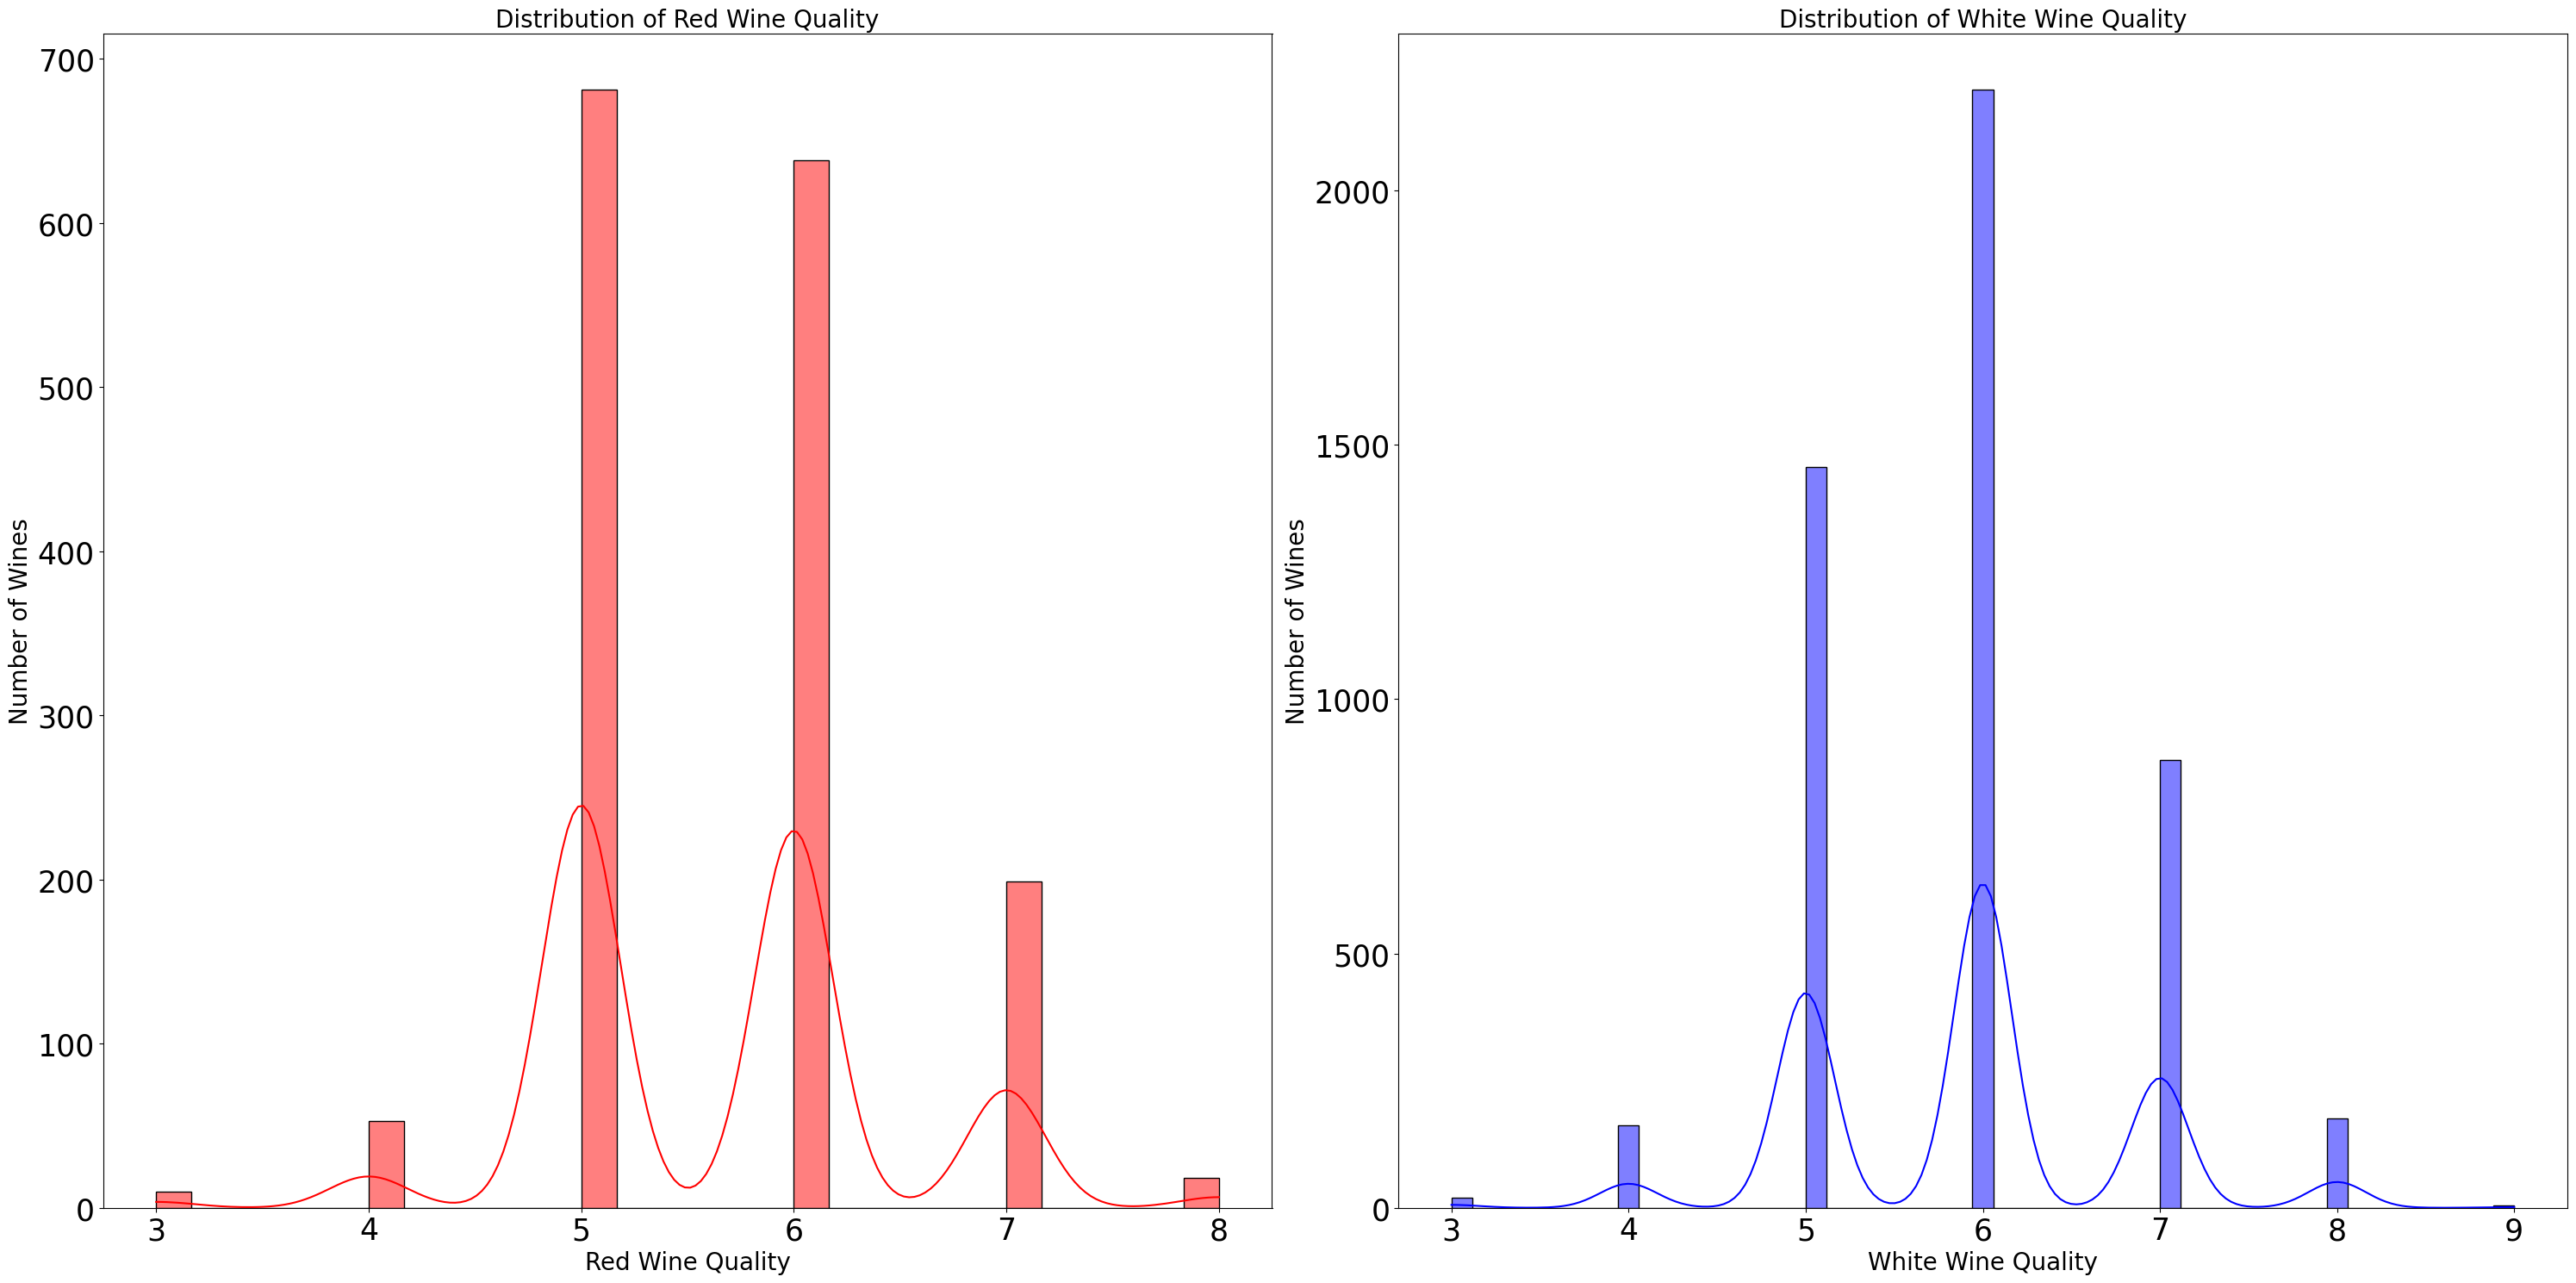

In [64]:
#################################################################
## COMPARING THE QUALITY OF RED AND WHITE WINES USING HISPLOTS ##
#################################################################
fig, axes = plt.subplots(1, 2, figsize=(30,15))
sns.histplot(redWineData['quality'], ax=axes[0], color='red', kde=True)
sns.histplot(whiteWineData['quality'], ax=axes[1], color='blue', kde=True)
axes[0].set_xlabel("Red Wine Quality", fontsize=20)
axes[0].set_ylabel("Number of Wines", fontsize=20)
axes[1].set_xlabel("White Wine Quality", fontsize=20)
axes[1].set_ylabel("Number of Wines", fontsize=20)
axes[0].set_title("Distribution of Red Wine Quality", fontsize=20)
axes[1].set_title("Distribution of White Wine Quality", fontsize=20)
axes[0].tick_params(axis='both', labelsize=25)
axes[1].tick_params(axis='both', labelsize=25)
fig.tight_layout()
fig.show()
plt.savefig('./figures/Quality-Distribution.jpeg')

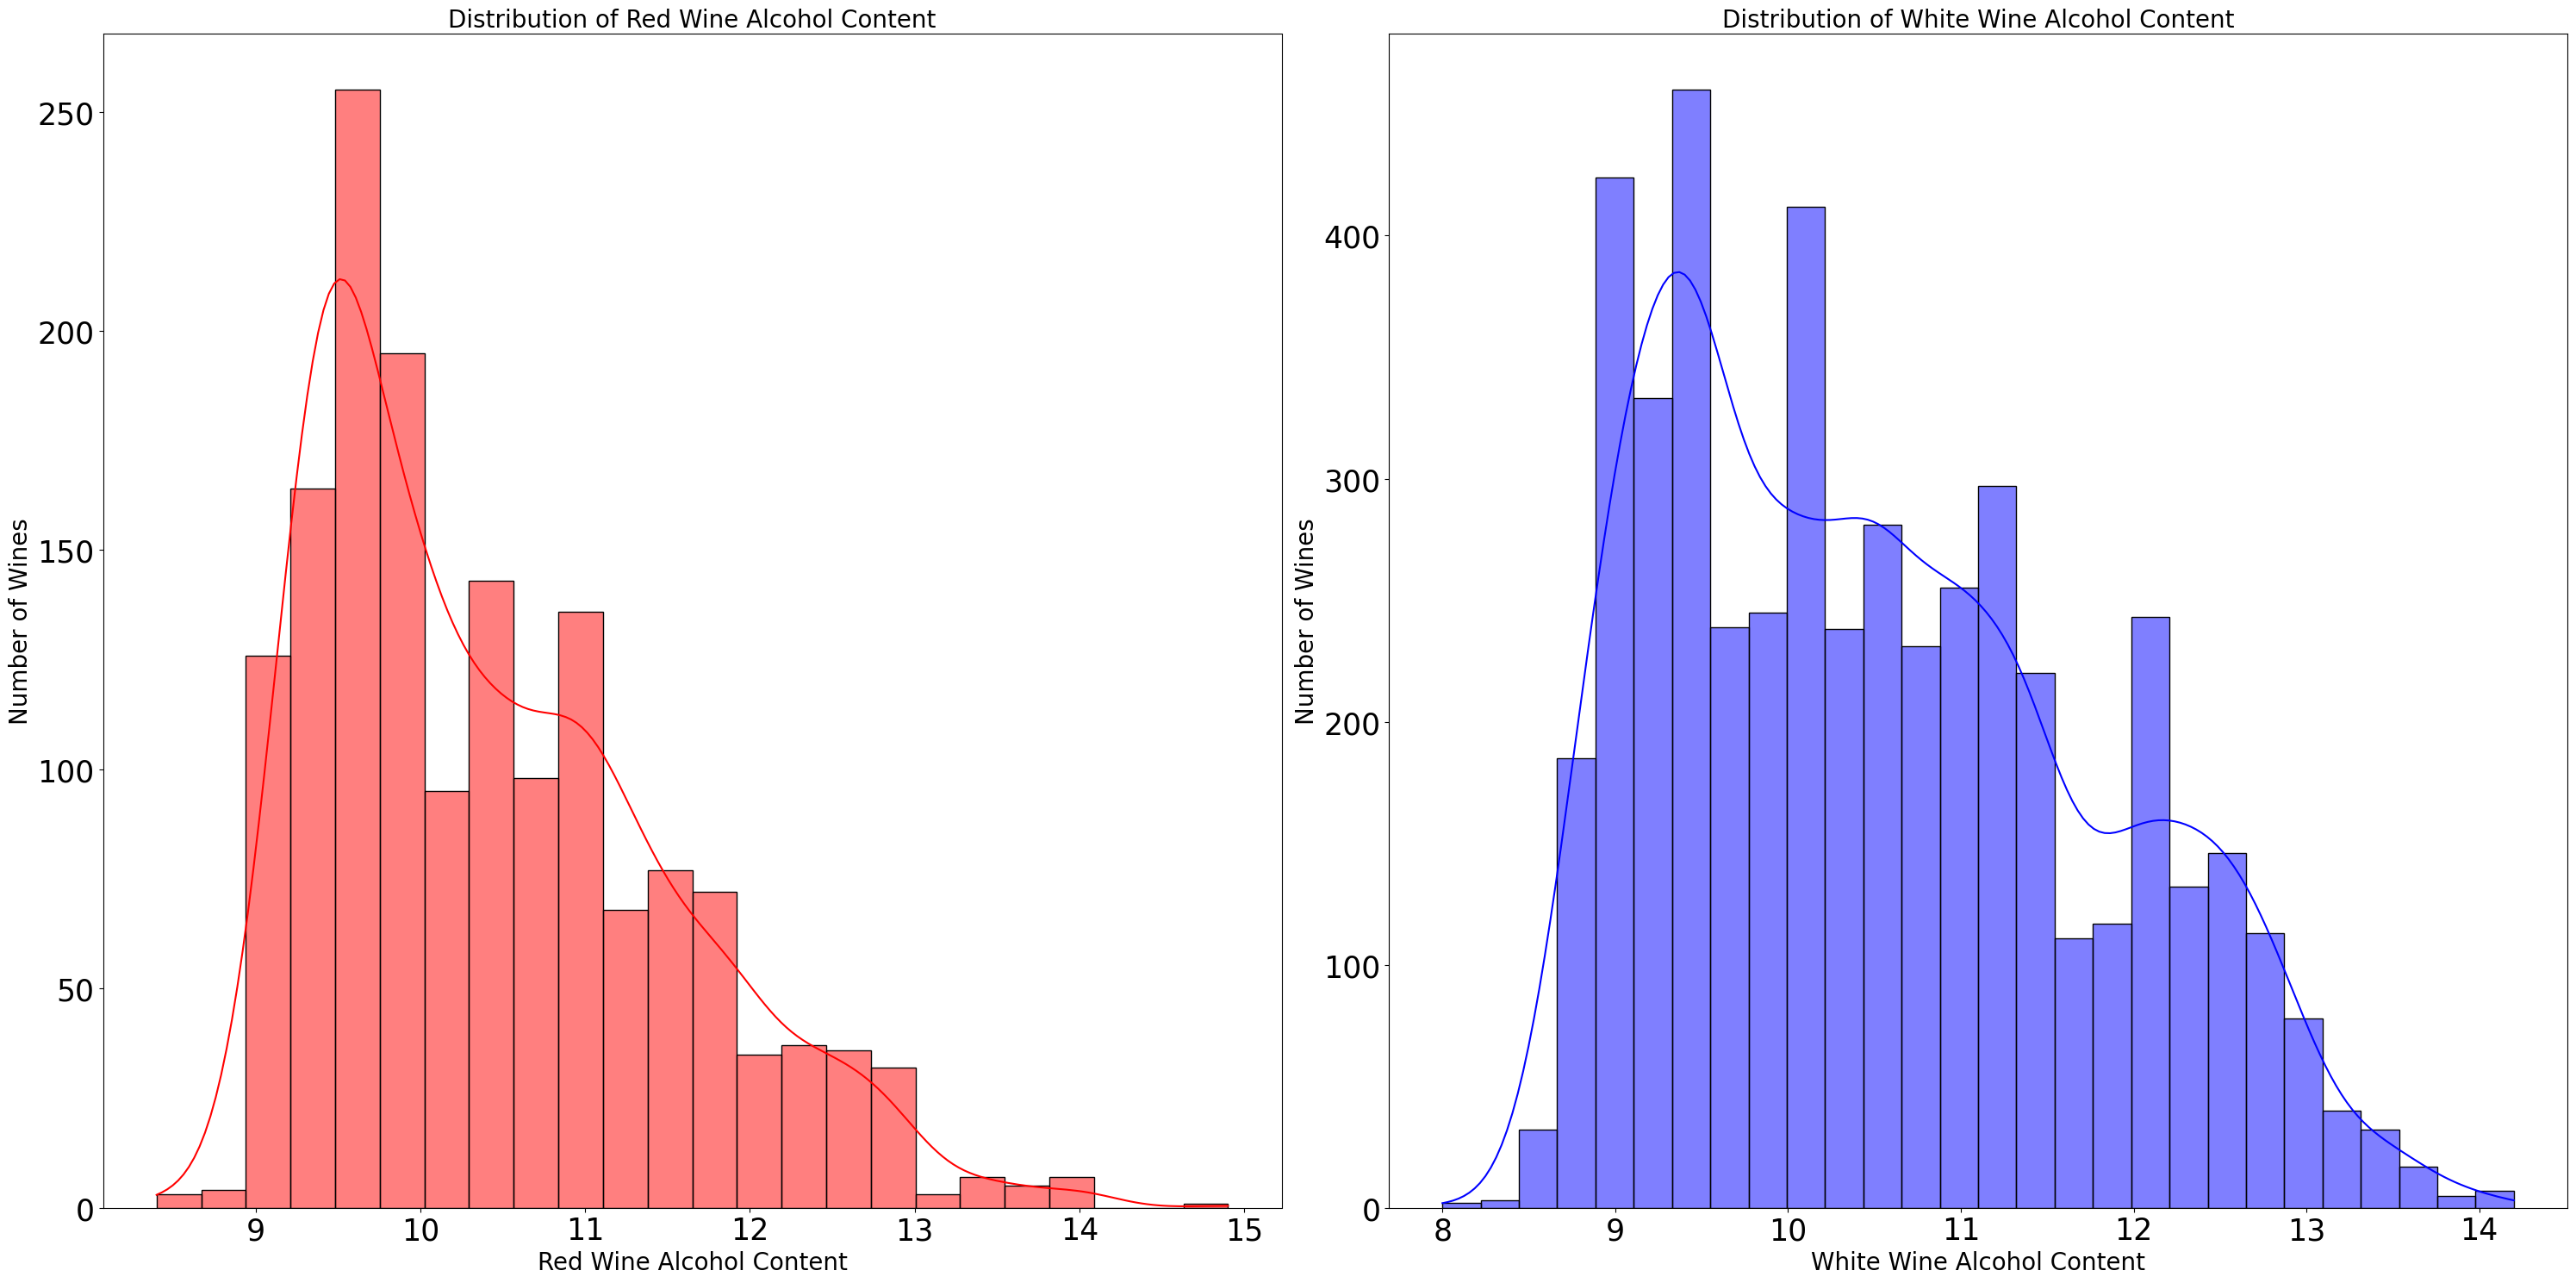

In [67]:
#########################################################################
## COMPARING THE ALCOHOL CONTENT OF RED AND WHITE WINE USING HISTPLOTS ##
#########################################################################
fig, axes = plt.subplots(1, 2, figsize=(30,15))
sns.histplot(redWineData['alcohol'], ax=axes[0], color='red', kde=True)
sns.histplot(whiteWineData['alcohol'], ax=axes[1], color='blue', kde=True)
axes[0].set_xlabel("Red Wine Alcohol Content", fontsize=20)
axes[0].set_ylabel("Number of Wines", fontsize=20)
axes[1].set_xlabel("White Wine Alcohol Content", fontsize=20)
axes[1].set_ylabel("Number of Wines", fontsize=20)
axes[0].set_title("Distribution of Red Wine Alcohol Content", fontsize=20)
axes[1].set_title("Distribution of White Wine Alcohol Content", fontsize=20)
axes[0].tick_params(axis='both', labelsize=25)
axes[1].tick_params(axis='both', labelsize=25)
fig.tight_layout()
fig.show()
plt.savefig('./figures/Alcohol-Distribution.jpeg')

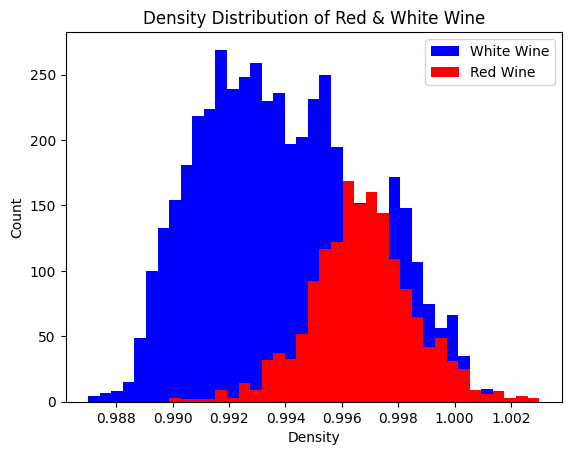

The mean for the density in the red wine is: 0.9967466791744841
The std for density in red wine is: 0.0018873339538425554
The mean for density slcohol in the white wine is: 0.9940273764801959
The std for density in the white wine is: 0.0029909069169369337


In [9]:
#################################################
## COMPARING THE DENSITY OF RED AND WHITE WINE ##
#################################################
# Getting the number of white wines with their respective densities
whiteHistogram = plt.hist(whiteWineData['density'], bins=np.linspace(0.987,1.003,40), color='blue', label="White Wine")
# Getting the number of red wines with their respective densities
redHistogram = plt.hist(redWineData['density'], bins=np.linspace(0.987,1.003,40), color='red',label="Red Wine")
# Making the plot.
plt.legend(loc='upper right')
plt.xlabel('Density')
plt.ylabel('Count')
plt.title('Density Distribution of Red & White Wine')
plt.savefig('./figures/Density-Distribution.jpeg')
plt.show()
# Getting the mean and standard deviation stats for the density distribution.
redDensityMean = redSummary['density']['mean']
redDensityStd = redSummary['density']['std']
whiteDensityMean = whiteSummary['density']['mean']
whiteDensityStd = whiteSummary['density']['std']
print("The mean for the density in the red wine is: " + str(redDensityMean))
print("The std for density in red wine is: " + str(redDensityStd))
print("The mean for density slcohol in the white wine is: " + str(whiteDensityMean))
print("The std for density in the white wine is: " + str(whiteDensityStd))

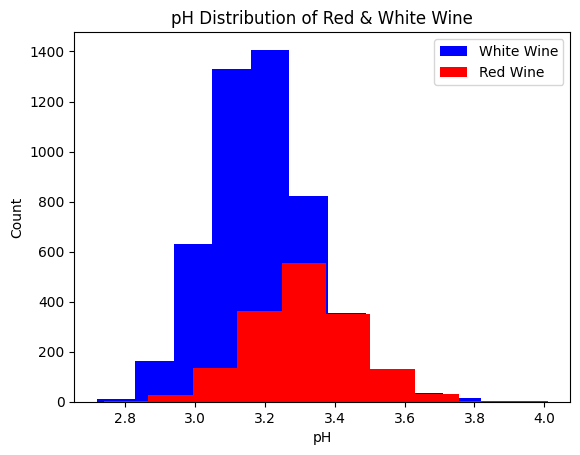

The mean for the pH in the red wine is: 3.3111131957473416
The std for pH in red wine is: 0.15438646490354277
The mean for pH slcohol in the white wine is: 3.1882666394446715
The std for pH in the white wine is: 0.1510005996150668


In [10]:
#################################################
## COMPARING THE pH OF RED AND WHITE WINE ##
#################################################
# Getting the number of white wines with their respective densities
whiteHistogram = plt.hist(whiteWineData['pH'], color='blue', label="White Wine")
# Getting the number of red wines with their respective densities
redHistogram = plt.hist(redWineData['pH'], color='red',label="Red Wine")
# Making the plot.
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Count')
plt.title('pH Distribution of Red & White Wine')
plt.savefig('./figures/pH-Distribution.jpeg')
plt.show()
# Getting the mean and standard deviation stats for the density distribution.
redpHMean = redSummary['pH']['mean']
redpHStd = redSummary['pH']['std']
whitepHMean = whiteSummary['pH']['mean']
whitepHStd = whiteSummary['pH']['std']
print("The mean for the pH in the red wine is: " + str(redpHMean))
print("The std for pH in red wine is: " + str(redpHStd))
print("The mean for pH slcohol in the white wine is: " + str(whitepHMean))
print("The std for pH in the white wine is: " + str(whitepHStd))

In [ ]:
########################################################################################
## CREATING BAR CHARTS TO COMPARE THE MEANS OF ALL ATTRIUBUTES IN RED AND WHITE WINES ##
########################################################################################
# Creating a figure of a particular size.
plt.figure(figsize=(10,15))
# Adding the white win data to the bar chart.
whiteBar = plt.bar(whiteSummary.columns, whiteSummary.loc['mean'], label="White Wine", color="blue")
# Adding the red white data to the bar chart. 
redBar = plt.bar(redSummary.columns, redSummary.loc['mean'], label="Red Wine", color="red", width=0.6)
# Styling the bar chart.
redBar.set_label = 'Red Wine'
whiteBar.set_label = 'White Wine'
# Styling the graph
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,140,5))
plt.legend()
plt.xlabel("Attributes")
plt.ylabel("Mean value")
plt.title("Mean value of Attributes")
plt.savefig('./figures/Mean-Value-of-Attributes.jpeg')

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


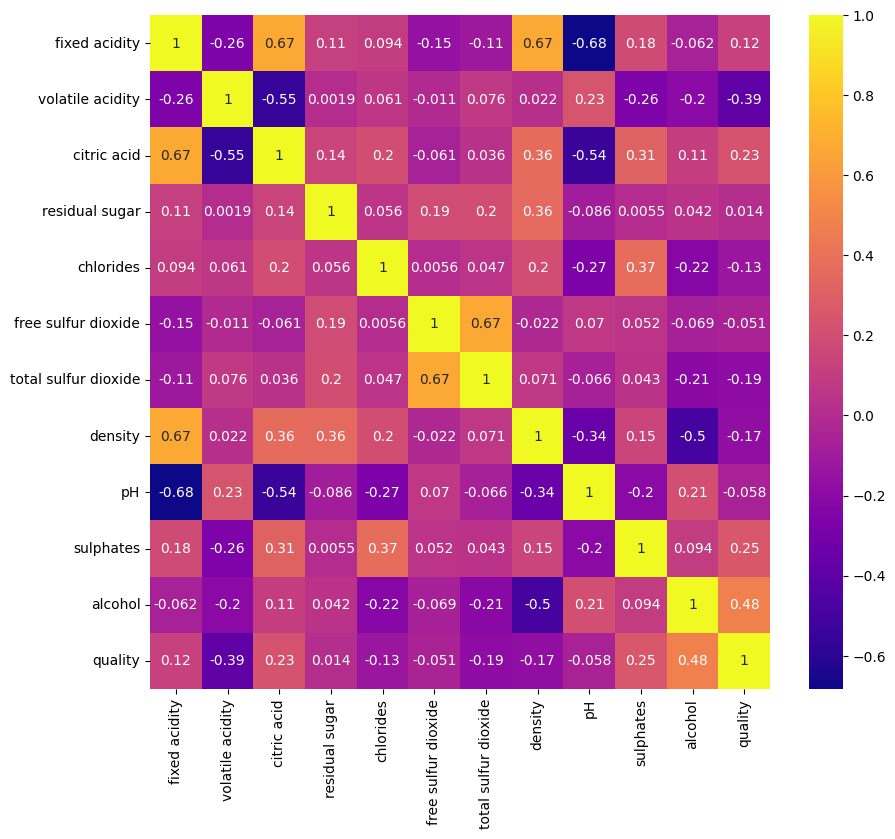

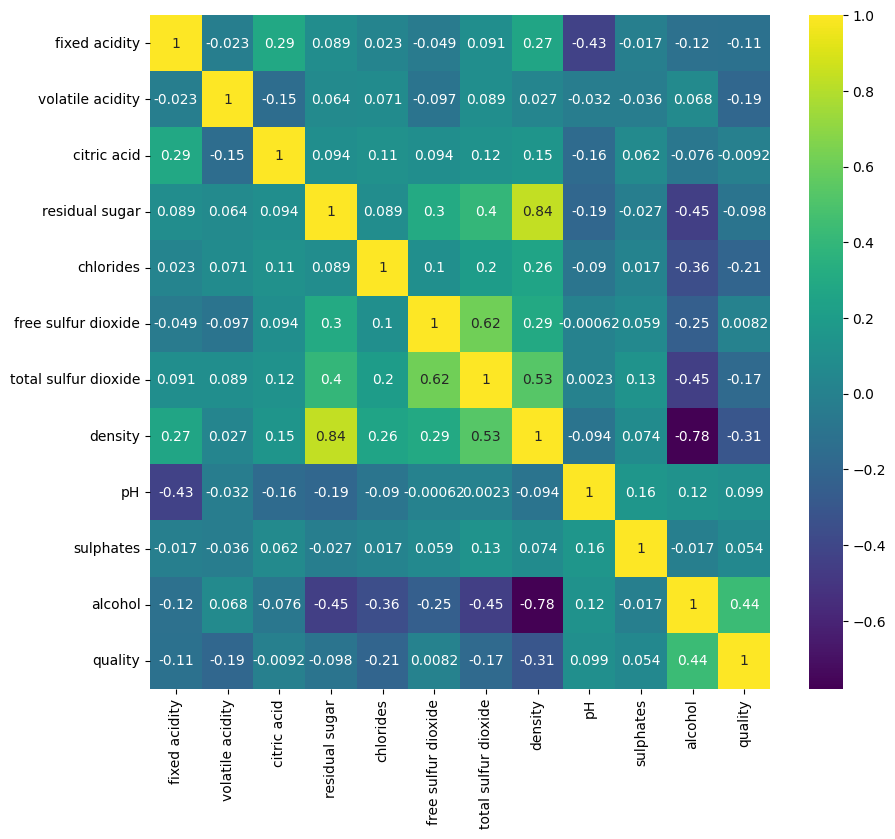

In [11]:
#######################################################################################################
## CALCULATING CORRELATION BETWEEN QUALITY AND THE OTHER FEATURES IN THE RED AND WHITE WINE DATASETS ##
#######################################################################################################
redWineCorrelation = redWineData.corr()
plt.figure(figsize=(10,8.75))
# Making a heatmap to show the correlation between different features in the red wine dataset. 
sns.heatmap(redWineCorrelation, annot=True, cmap='plasma')
plt.savefig('./figures/Correlation_Matrix_Red_Wine.jpeg')
# Printing out the values that are used to show the correlation and are present in the heatmap as well. 
print(redWineCorrelation['quality'].sort_values(ascending=False))
whiteWineCorrelation = whiteWineData.corr()
plt.figure(figsize=(10,8.75))
# Making a heatmap to show the correlation between different features in the red wine dataset. 
sns.heatmap(whiteWineCorrelation, annot=True, cmap='viridis')
plt.savefig('./figures/Correlation_Matrix_White_Wine.jpeg')
# Printing out the values that are used to show the correlation and are present in the heatmap as well. 
print(whiteWineCorrelation['quality'].sort_values(ascending=False))